<a href="https://colab.research.google.com/github/Faizack/Clone/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


## Importing the DataSet

In [3]:
trainD= pd.read_csv('/content/fraudTrain.csv')
testD= pd.read_csv('/content/fraudTest.csv')


In [4]:
print("trainD Shape",trainD.shape) #Shape- no of rows and columns
print("trainD Size",trainD.size) #Size- number of elements in the data file
print("testD Shape",trainD.shape) #Shape- no of rows and columns
print("testD Size",trainD.size) #Size- number of elements in the data file

trainD Shape (31151, 23)
trainD Size 716473
testD Shape (31151, 23)
testD Size 716473


## Data PreProcessing

In [5]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [6]:
print("Details of Train Data".center(100))
details(trainD)

                                       Details of Train Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Unnamed: 0,0,0.00000,int64,31151
trans_date_trans_time,0,0.00000,object,30794
cc_num,0,0.00000,int64,909
merchant,0,0.00000,object,693
category,0,0.00000,object,14
amt,0,0.00000,float64,13176
first,0,0.00000,object,337
last,0,0.00000,object,465
gender,0,0.00000,object,2
street,0,0.00000,object,909


In [7]:
print("Details of Train Data".center(100))
details(trainD)

                                       Details of Train Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Unnamed: 0,0,0.00000,int64,31151
trans_date_trans_time,0,0.00000,object,30794
cc_num,0,0.00000,int64,909
merchant,0,0.00000,object,693
category,0,0.00000,object,14
amt,0,0.00000,float64,13176
first,0,0.00000,object,337
last,0,0.00000,object,465
gender,0,0.00000,object,2
street,0,0.00000,object,909


In [8]:
print("Details of Test Data".center(100))
details(testD)

                                        Details of Test Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Unnamed: 0,0,0.000000,int64,35008
trans_date_trans_time,0,0.000000,object,34350
cc_num,0,0.000000,int64,910
merchant,0,0.000000,object,693
category,0,0.000000,object,14
amt,0,0.000000,float64,13842
first,0,0.000000,object,338
last,0,0.000000,object,467
gender,0,0.000000,object,2
street,0,0.000000,object,910


Remove null Row

In [9]:
cleaned_Train_df=trainD.dropna(0)
cleaned_Test_df=testD.dropna(0)


In [10]:
cleaned_Train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Remove Unwanted Column

In [11]:
cleaned_Train_df.drop(['Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'job', 'trans_num', 'unix_time', 'first', 'last'],1,inplace=True)
cleaned_Test_df.drop(['Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'job', 'trans_num', 'unix_time', 'first', 'last'],1,inplace=True)

In [12]:
def label_encode(df):
    """
    Performs label encoding for all object and category type columns in a dataframe,
    including the target column. Handles date and time columns separately.
    Returns the encoded dataframe.
    """
    # Create a copy of the dataframe
    encoded_df = df.copy()
    
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode object and category type columns
    for col in encoded_df.select_dtypes(include=['object', 'category']):
        encoded_df[col] = le.fit_transform(encoded_df[col])
    
    # Handle date and time columns separately
    for col in encoded_df.select_dtypes(include=['datetime64']):
        encoded_df[col] = encoded_df[col].astype(int)
    
    return encoded_df

In [13]:
df_train = label_encode(cleaned_Train_df)
df_test = label_encode(cleaned_Test_df)


## EDA 

Total Transactions

In [18]:
non_fraud_train = df_train[df_train['is_fraud'] == 0]
fraud_train = df_train[df_train['is_fraud'] == 1]

non_fraud_test = df_test[df_test['is_fraud'] == 0]
fraud_test = df_test[df_test['is_fraud'] == 1]

Data Imbalance Check

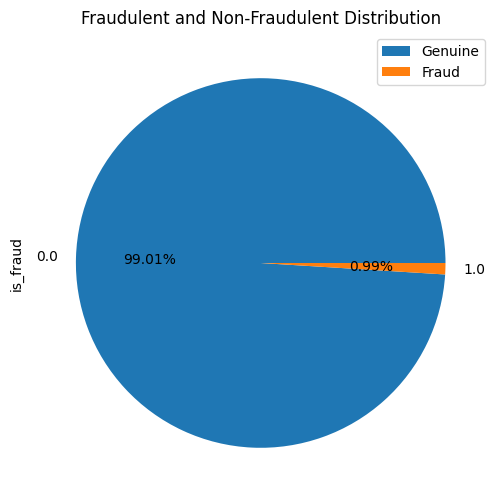

In [19]:
round(100*df_train['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

From the above graphs we can see the imbalance of the data

Univariate Analysis

<Axes: xlabel='category'>

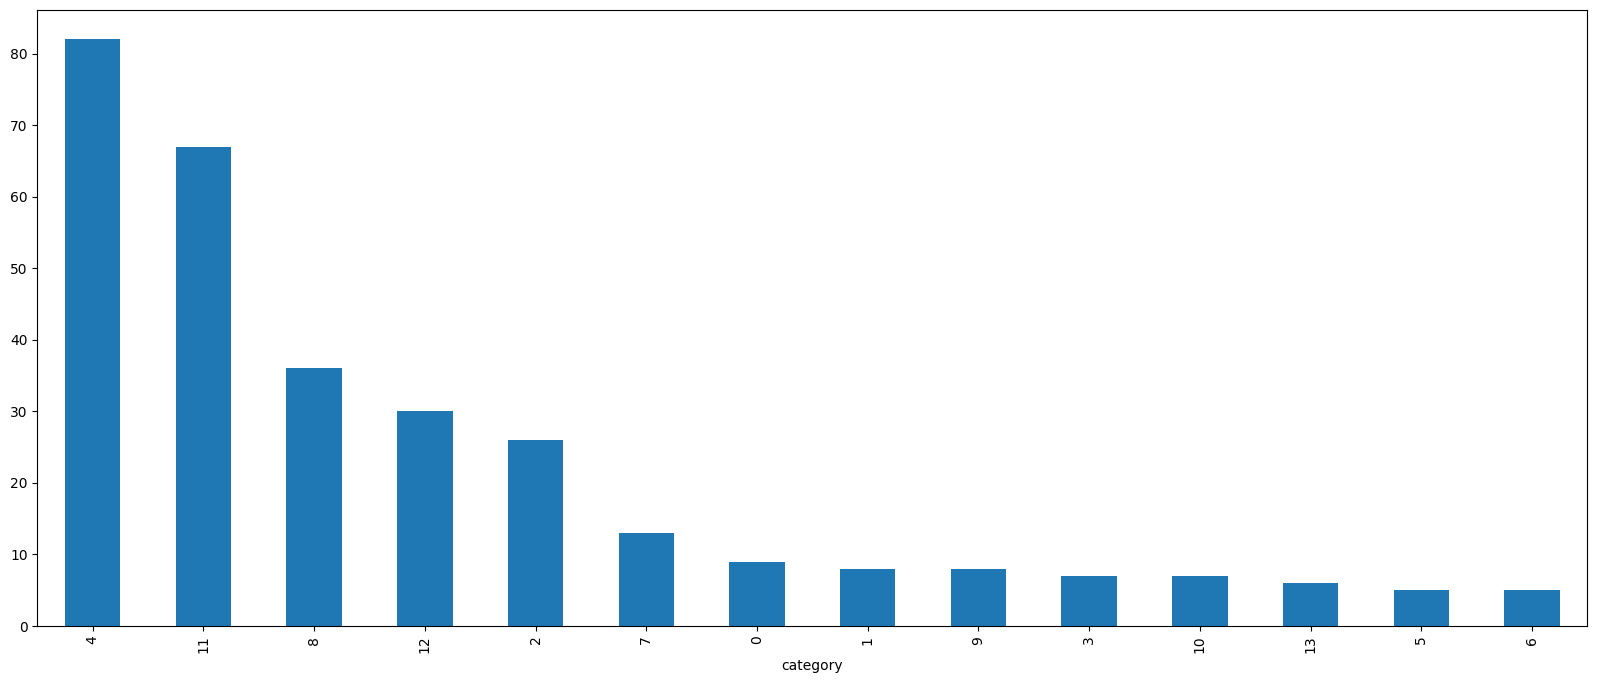

In [21]:
fraud_train.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,8))

Highest fraud transactions are shown in categories above

##  Preparation for Modelling with original data

In [14]:
X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

## Defining Runnning And Evalting 5 Model

* Logistic Regression
* Decision Tree 
* KNN
* Naive Bayes (Gaussian)
* Random Forest


In [15]:

def evaluate_models(X_train, y_train, X_test, y_test):
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes (Gaussian)': GaussianNB(),
        'Random Forest': RandomForestClassifier(),     
    }

    # Fit the models, make predictions, and calculate evaluation metrics
    results = {}
    for name, model in models.items():
        # Fit the model using cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Model: {name}")
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {scores.mean()}")
        print(f"Standard deviation of cross-validation scores: {scores.std()}")

        # Fit the model on the entire training set and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_roc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc_roc': auc_roc,
            'confusion': confusion,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }
        
        # Print the evaluation metrics
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"AUC-ROC: {auc_roc}")
        print(f"Confusion Matrix:\n{confusion}")
        print("")

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return results


Model: Logistic Regression
Cross-validation scores: [0.98924559 0.98988764 0.9882825  0.98892456 0.98876404]
Mean cross-validation score: 0.9890208667736757
Standard deviation of cross-validation scores: 0.0005333305850990752
Accuracy: 0.9944582512069015
Precision: 0.5390091316532393
Recall: 0.5166793967849498
F1 Score: 0.523120318174541
AUC-ROC: 0.5166793967849498
Confusion Matrix:
[[34808    56]
 [  138     5]]



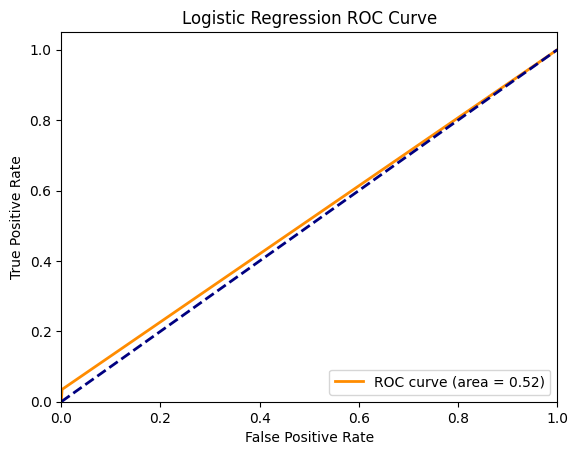

Model: Decision Tree
Cross-validation scores: [0.99373997 0.99165329 0.99277689 0.99245586 0.99438202]
Mean cross-validation score: 0.9930016051364365
Standard deviation of cross-validation scores: 0.0009609392967637815
Accuracy: 0.9943154226297598
Precision: 0.671928322933348
Recall: 0.7185730887973889
F1 Score: 0.6924183818878821
AUC-ROC: 0.7185730887973889
Confusion Matrix:
[[34745   119]
 [   80    63]]



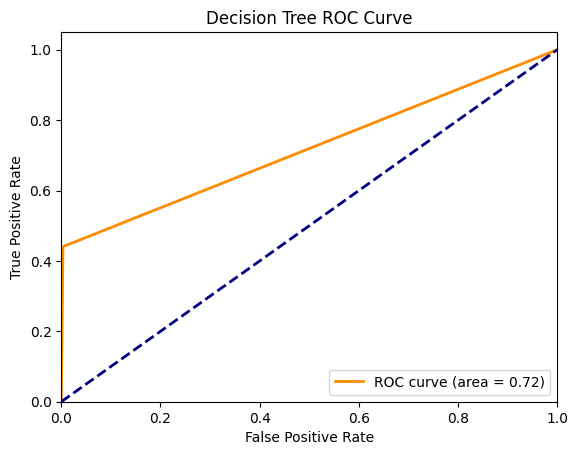

Model: K-Nearest Neighbors
Cross-validation scores: [0.98972713 0.98924559 0.98892456 0.99069021 0.99085072]
Mean cross-validation score: 0.9898876404494381
Standard deviation of cross-validation scores: 0.0007664421435835049
Accuracy: 0.9935441483131945
Precision: 0.567745315981239
Recall: 0.5545242532822845
F1 Score: 0.5603955715403993
AUC-ROC: 0.5545242532822845
Confusion Matrix:
[[34765    99]
 [  127    16]]



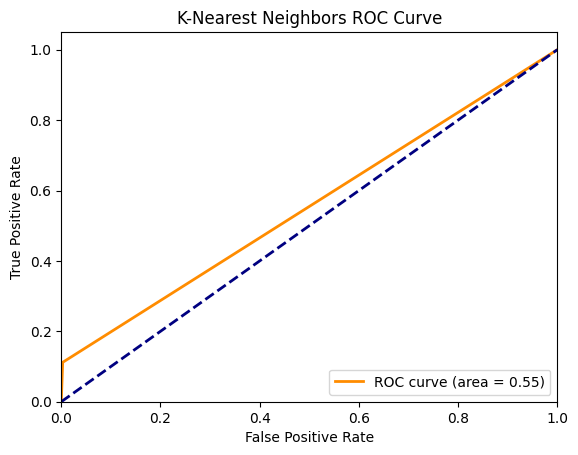

Model: Naive Bayes (Gaussian)
Cross-validation scores: [0.98715891 0.97961477 0.98202247 0.98491172 0.98314607]
Mean cross-validation score: 0.983370786516854
Standard deviation of cross-validation scores: 0.0025573606762959123
Accuracy: 0.9883737538206644
Precision: 0.5839164041956829
Recall: 0.7330008793409436
F1 Score: 0.622300922734881
AUC-ROC: 0.7330008793409436
Confusion Matrix:
[[34532   332]
 [   75    68]]



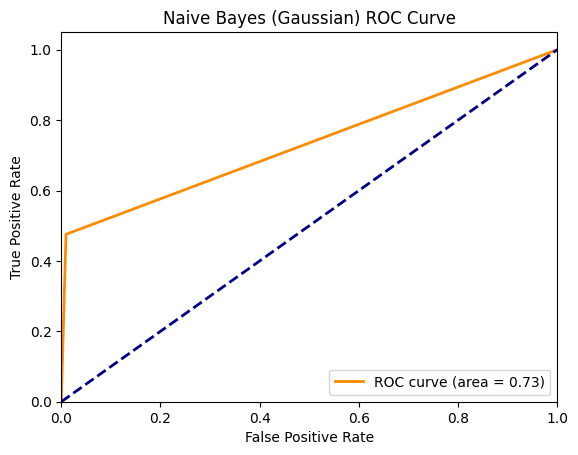

Model: Random Forest
Cross-validation scores: [0.99229535 0.994061   0.99213483 0.99373997 0.99422151]
Mean cross-validation score: 0.9932905296950241
Standard deviation of cross-validation scores: 0.0008931253767732792
Accuracy: 0.9964292855714572
Precision: 0.8462386037609609
Recall: 0.61168733171372
F1 Score: 0.6684170744321121
AUC-ROC: 0.6116873317137199
Confusion Matrix:
[[34850    14]
 [  111    32]]



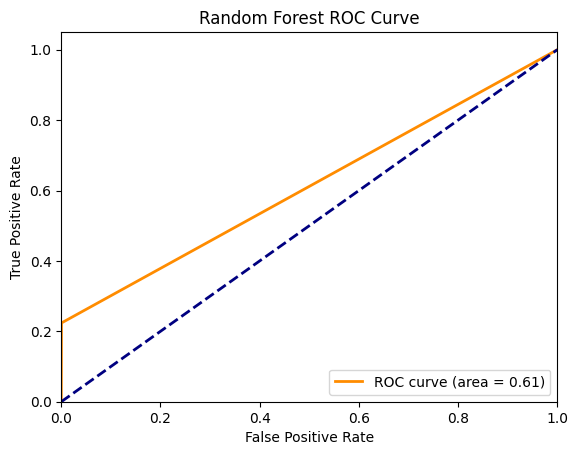

In [17]:
results = evaluate_models(X_train , y_train, X_test,y_test)